# Overview

We are primarily interested in seeing if a country’s GDP per capita has an impact in the probability and likelihood of a citizen or resident of that country to commit suicide. If a correlation is seen, this information could help prevent the number of suicides committed in certain countries by raising awareness and sharing knowledge of this correlation. Finding the correlation could possibly reduce the impact GDP per capita has on the number of suicides seen in countries.

## Names
- Lucy Xu
- Tracy He
- Stacy Kim
- Thy Vu
- Stephanie Schneider
- Amaya Mali

## Research Question
Is there a correlation between a country’s GDP per capita and the number of suicides committed per population in that country and how has the increase or decrease in GDP affect this rate of suicide over time?

## Background and Prior Work

Suicide is a major health problem that happens in almost every country and is the leading cost of death in the United States. Suicide has lasting effects on the family, friends, and the communities of the person committing it. There have been multiple attempts to decrease suicides: emergency suicide hotline, therapy services, etc., but since the reasons behind suicide vary, it is difficult to prevent it indefinitely. We plan to analyze the conditions of countries by observing each countries’ GDP per capita over time to see if there is a correlation between this value and suicide rates. GDP per capita is a measure of a country’s economic output that accounts for its number of people. It is the best measurement of a country’s standard of living and is indicative of the prosperity of a country. Therefore, we have decided to measure the relationship between these two values to foresee any correlation that might be visible and to prevent future rates from increasing by analyzing the rate of increase or decrease in suicide rates in relation to the increase or decrease in GDP per capita over time. There have been research studies done on suicide rates in OECD countries and they found that adolescence and the male gender were both high factors contributing to the risk and that there generally was a difference between rates for both genders. In Brazil, they did a study research suicide rates and economic indicators such as GDP and unemployment. They discovered that there was an inverse relationship between suicide rates and unemployment, however there did not seem to be a relationship to Brazil’s GDP.

References (include links):

1) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5912485/
2) https://www.ingentaconnect.com/content/wk/yco/2018/00000031/00000003/art00015
3) https://www.who.int/news-room/fact-sheets/detail/suicide?fbclid=IwAR0YVVPJ6yid-F7u96vg9NXaBfXXPfw_-Hxdw5pOCnaPbbXmox7cuGrJRDM  


## Hypothesis

There is a correlation between a country’s GDP per capita and the number of suicides committed per population and we hypothesize that countries with lower GDP per capita will have greater rates of suicide due to poorer socioeconomic conditions and lack of mental health awareness and understanding. However, since various different factors contribute to suicide, we do not predict that the correlation will be very strong.

## Dataset

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
We found our data through Kaggle in which the author compiled dataset that was pulled from four datasets– specifically from the United Nations Development Program, World Bank, World Health Organization and, Suicide in the 21st Century (another dataset on Kaggle). The author hoped that the dataset would inspire suicide prevention among those who used it.

This dataset provides 27,800 rows of data specifically on the country, year, sex, age, suicides/100k (of population), gdp, and more. We feel that given the large amount of data this dataset provides, we are able to make a reliable inference because it is representative of the countries we will be looking at. 

The dataset “Suicide Rates Overview 1985 to 2016” includes variables regarding country, year, sex, age, number of suicides, population, suicide per 100k in population, HDI per year, GDP per year and per capita, and generation. It includes 27.8k observations and is a compilation of 4 different datasets that were used to potentially find any correlations between suicide rates in different categories.




## Importing Data

In [77]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy

import statsmodels.api as sm
from scipy import stats
import patsy

In [78]:
df = pd.read_csv('master.csv')

##  <font color='salmon'>Testing for missing countries</font>

#### Once we recognized that some countries have missing years (not listed as 0 or NaN, but rather, nonexistent rows), we decided to find out which countries were lacking in data. We worked through by range to see which year(s) had the most available countries listed before cleaning so that we can provide the most accurate analysis.

###  <font color='purple'>Missing countries within full (1987-2016) range</font>

In [79]:
"""
Extracting country-year column into usable variable (the - threw off further code)
"""

df.country.unique()
df['countryyear'] = df['country-year']

"""
adding csv_df to countries variable
"""
countries = df.country.unique()




"""
Checking for missing country/year data within full 1985-2016 range. 
Missing data checking for: Fully unlisted year rows, 
NOT missing portions such as NaN, None, or 0.
"""
years = list(range(1985,2017))
missing_data_countries = {}
for i in countries:
    for j in years:
        cntry_yr = str(i+str(j))
        if len(df[df.countryyear==cntry_yr]) <= 0:
            if i in missing_data_countries:
                missing_data_countries[i].append(j)
            else:
                missing_data_countries[i] = [j]
                
                
"""
Printing out below cell in this order:
1 Original number of countries,
2 Number with full year(s) data available within range, 
3 Number of countries without available data from ALL year(s) within range.
"""
original = len(df.country.unique())
for i in missing_data_countries.keys():
    df = df[df.country != i]
    
removed = len(df.country.unique())

print(original," ",removed," ",len(missing_data_countries))

101   4   97


#### The above cell showcases that within the full range (1985-2016), only 4 countries reported all years. Now we will try again with smaller ranges, with preference for recent years, excluding 2016 as it a commonly unreported year (16 out of 101 countries reported in 2016 vs 62 out of 101 in 2015).

### <font color='purple'>Missing countries within 2000-2015 range</font>

In [80]:
"""
Reloading csv setup
"""
df = pd.read_csv('master.csv')
df.country.unique()
df['countryyear'] = df['country-year']
countries = df.country.unique()


"""
Checking for missing country/year data within 2000-2015 range. 
Missing data checking for: 
Fully unlisted year rows, NOT missing portions such as NaN, None, or 0.
"""
years = list(range(2000,2016))
missing_data_countries = {}
for i in countries:
    for j in years:
        cntry_yr = str(i+str(j))
        if len(df[df.countryyear==cntry_yr]) <= 0:
            if i in missing_data_countries:
                missing_data_countries[i].append(j)
            else:
                missing_data_countries[i] = [j]
                
"""
Printing out below cell in this order:
1 Original number of countries,
2 Number with full year(s) data available within range, 
3 Number of countries without available data from ALL year(s) within range.
"""
original = len(df.country.unique())
for i in missing_data_countries.keys():
    df = df[df.country != i]
    
removed = len(df.country.unique())

print(original," ",removed," ",len(missing_data_countries))

101   49   52


At this stage, over half of available countries did not report all years within range.
Further shortening year range below. 
  Report:
    2005-2015 showed 54 out of 101 countries with full years data (47 missing)
    2005-2014 showed 63 out of 101 countries with full years data (38 missing)
    2005-2013 showed 68 out of 101 countries with full years data (33 missing)
    2006-2013 70/101 available (31 missing)
    2006-2012 71/101 available (30 missing)
    2007-2012 72/101 available (29 missing)
    2008-2013 72/101 available (29 missing)
    2008-2014 67/101 available (34 missing)
    2007-2013 71/101 available (30 missing)
    Currently, 2007-2013 is the largest range of available country-year data to work with.

 

### <font color='purple'>Missing countries within 2000-2015 range</font>

In [12]:
"""
Reloading csv setup
"""
df = pd.read_csv('master.csv')
df.country.unique()
df['countryyear'] = df['country-year']
countries = df.country.unique()

"""
Checking for missing country/year data within 2007-2013 range. 
Missing data checking for: 
Fully unlisted year rows, NOT missing portions such as NaN, None, or 0.
"""
years = list(range(2007,2014))
missing_data_countries = {}
for i in countries:
    for j in years:
        cntry_yr = str(i+str(j))
        if len(df[df.countryyear==cntry_yr]) <= 0:
            if i in missing_data_countries:
                missing_data_countries[i].append(j)
            else:
                missing_data_countries[i] = [j]

In [13]:
"""
Checking for missing country/year data within 2007-2013 range. 
Missing data checking for: 
Fully unlisted year rows, NOT missing portions such as NaN, None, or 0.
"""
years = list(range(2007,2014))
missing_data_countries = {}
for i in countries:
    for j in years:
        cntry_yr = str(i+str(j))
        if len(df[df.countryyear==cntry_yr]) <= 0:
            if i in missing_data_countries:
                missing_data_countries[i].append(j)
            else:
                missing_data_countries[i] = [j]
                
"""
Printing out below cell in this order:
1 Original number of countries,
2 Number with full year(s) data available within range, 
3 Number of countries without available data from ALL year(s) within range.
"""
original = len(df.country.unique())
for i in missing_data_countries.keys():
    df = df[df.country != i]
    
removed = len(df.country.unique())

print(original," ",removed," ",len(missing_data_countries))

In [81]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,countryyear
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,Argentina1985
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,Argentina1985
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent,Argentina1985
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,Argentina1985
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers,Argentina1985


#### <font color='purple'>From the above data testing, we decided to continue with the range of 2007-2013.</font> 

## Data Cleaning

#### This gives us the rows with missing data and then we will see how many values in each category are NaN

In [82]:
#Gives us the rows with missing data
df.isnull()
missing_info = df[df.isnull().any(axis = 1)]

df.dropna(subset = ['HDI for year', 'country', 'year'])
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          11392
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
countryyear               0
dtype: int64

In [83]:
#Removes columns 'HDI for year' and 'country-year'
df = df.drop(columns = ['HDI for year', 'country-year', 'countryyear'])
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
588,Argentina,1985,male,75+ years,202,363000,55.65,"88,416,668,900",3264,G.I. Generation
589,Argentina,1985,male,55-74 years,485,1997000,24.29,"88,416,668,900",3264,G.I. Generation
590,Argentina,1985,male,35-54 years,414,3346300,12.37,"88,416,668,900",3264,Silent
591,Argentina,1985,female,55-74 years,210,2304000,9.11,"88,416,668,900",3264,G.I. Generation
592,Argentina,1985,male,25-34 years,177,2234200,7.92,"88,416,668,900",3264,Boomers


In [84]:
df.columns = ["country", "year", "sex" ,"age", "suicides_no", "population", "suicides/100k_pop",
              "gdp_year", "gdp_capita", "generation"]
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,gdp_year,gdp_capita,generation
588,Argentina,1985,male,75+ years,202,363000,55.65,"88,416,668,900",3264,G.I. Generation
589,Argentina,1985,male,55-74 years,485,1997000,24.29,"88,416,668,900",3264,G.I. Generation
590,Argentina,1985,male,35-54 years,414,3346300,12.37,"88,416,668,900",3264,Silent
591,Argentina,1985,female,55-74 years,210,2304000,9.11,"88,416,668,900",3264,G.I. Generation
592,Argentina,1985,male,25-34 years,177,2234200,7.92,"88,416,668,900",3264,Boomers


## <font color='mediumorchid'>2007-2013 DATASET</font>

In [85]:
#get values of dataframe from only 2007-2013
df_range = df.loc[(df['year'] >= 2007)& (df['year'] <= 2013)]
df_range.head()


,country,year,sex,age,suicides_no,population,suicides/100k_pop,gdp_year,gdp_capita,generation
852,Argentina,2007,male,75+ years,225,634995,35.43,"287,530,508,431",7918,Silent
853,Argentina,2007,male,15-24 years,577,3381171,17.07,"287,530,508,431",7918,Millenials
854,Argentina,2007,male,55-74 years,438,2582754,16.96,"287,530,508,431",7918,Silent
855,Argentina,2007,male,25-34 years,490,3125322,15.68,"287,530,508,431",7918,Generation X
856,Argentina,2007,male,35-54 years,571,4436541,12.87,"287,530,508,431",7918,Boomers


In [86]:
#removed the comma in the values in 'gdp_for_year ($)' [2007-2013]
gdp_year = []
for elem in df_range['gdp_year']:
    gdp_year.append(int(elem.replace(',','')))

df_range['gdp_year'] = gdp_year
df_range.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,country,year,sex,age,suicides_no,population,suicides/100k_pop,gdp_year,gdp_capita,generation
852,Argentina,2007,male,75+ years,225,634995,35.43,287530508431,7918,Silent
853,Argentina,2007,male,15-24 years,577,3381171,17.07,287530508431,7918,Millenials
854,Argentina,2007,male,55-74 years,438,2582754,16.96,287530508431,7918,Silent
855,Argentina,2007,male,25-34 years,490,3125322,15.68,287530508431,7918,Generation X
856,Argentina,2007,male,35-54 years,571,4436541,12.87,287530508431,7918,Boomers


## Data Visualization

#### Viewing all the relationships within the dataset. The below visualization shows that there is some correlation between gdp and number of suicides.

[]

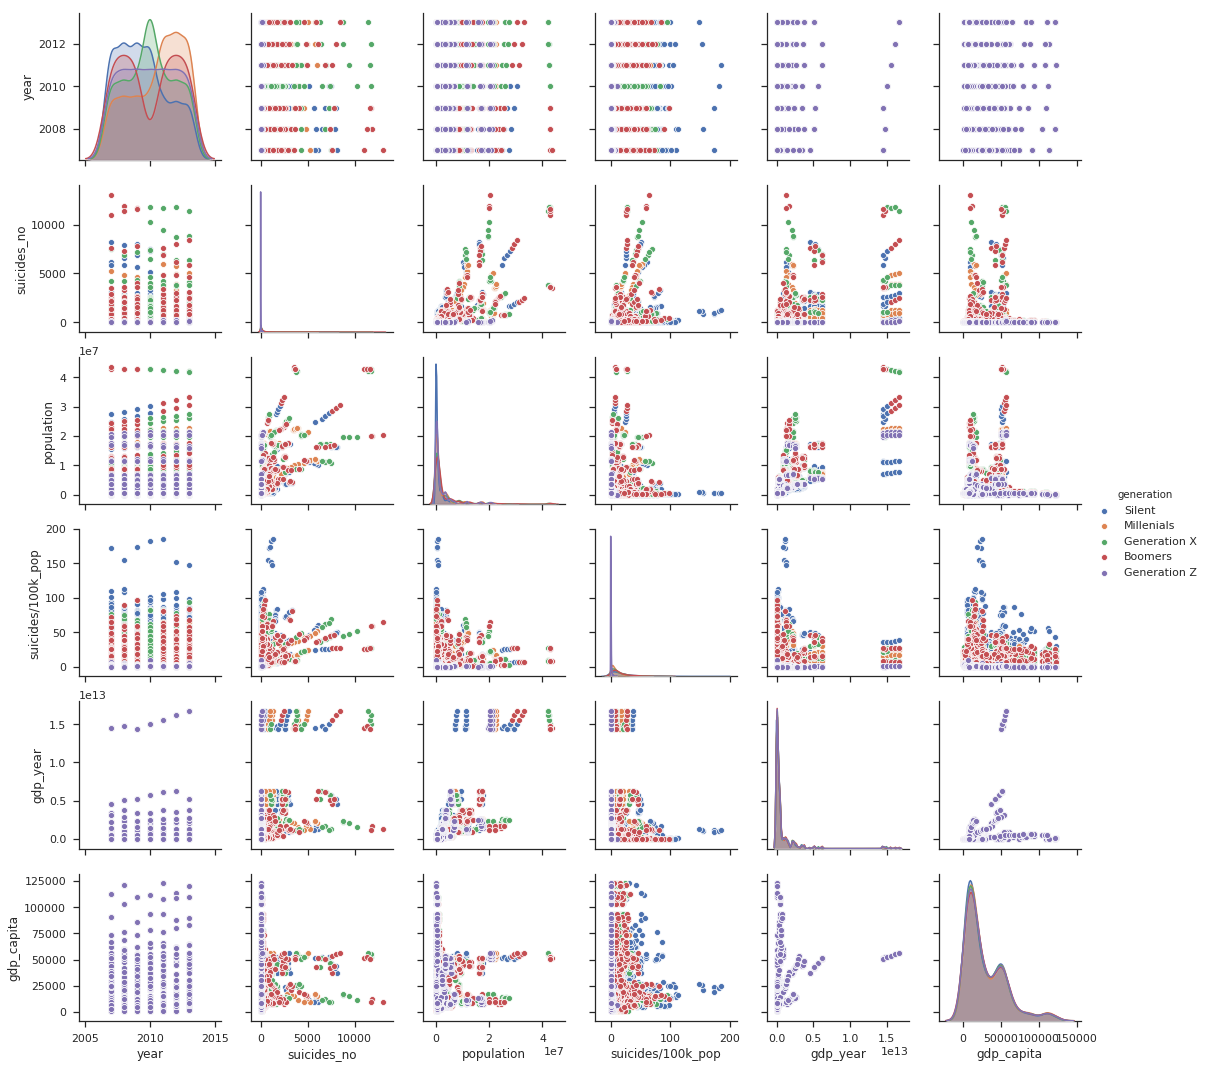

In [87]:

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df_range, hue="generation")

plt.plot()

#### In the above visualization, we wanted to show the relationship between variables as well as the distribution of single variables. To do this we created a pair plot with the variables year, suicides_no, population suicides/100k_pop, gdp_year, and gdp_capita from the dataframe df_range which extracted data from the years 2007 to 2013.

#### Because the above visualization does show some correlation between GDP and number of suicides, we continue to examine that more in depth.

In [89]:
#creates a groupby object for the sum of # of suicides [2007]
gb_sum_suicides_range = df_range.groupby('country')['suicides_no'].sum()


#creates a groupby object for the average gdp per year [2007]
gb_avg_gdp_year_range = df_range.groupby('country')['gdp_year'].mean()
#gb_avg_gdp_year_range.head()


#creates a groupby object for the average gdp per capita [2007]
gb_avg_gdp_capita_range = df_range.groupby('country')['gdp_capita'].mean()
#gb_avg_gdp_capita_range.head()


#converts the groupby object back to a dataframe [2007]
df_sum_suicides_range = gb_sum_suicides_range.to_frame()
df_sum_suicides_range.head()

,suicides_no
country,
Argentina,20979
Austria,8949
Belgium,13891
Belize,117
Brazil,67444


In [90]:
#converts the groupby object back to a dataframe [2007]
df_avg_gdp_capita_range = gb_avg_gdp_capita_range.to_frame()
df_avg_gdp_capita_range.head()

,gdp_capita
country,
Argentina,11478.571429
Austria,51597.142857
Belgium,48775.714286
Belize,5063.857143
Brazil,11384.000000


In [91]:
#converts the suicides_no to a list so we can add it to other dataframes [2007]
suicides_list = df_sum_suicides_range['suicides_no'].tolist()

## <font color='salmon'>Table:</font> 
### <font color='purple'>2007-2013 GDP Per Capita VS. Number of Suicides</font>

In [32]:
#adds suicide_no to gdp per capita dataframe [2007]
df_avg_gdp_capita_range['suicide_no'] = suicides_list
df_avg_gdp_capita_range.head()

,gdp_capita,suicide_no
country,,
Argentina,11478.571429,20979
Armenia,3628.285714,473
Australia,58256.571429,16907
Austria,51597.142857,8949
Bahamas,31223.571429,39


## <font color='salmon'>Graph:</font> 
### <font color='purple'>2007-2013 GDP Per Capita VS. Number of Suicides</font>

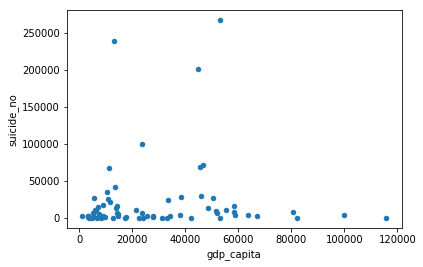

In [133]:
#graph of gdp per capita versus num of suicides [2007]
df_avg_gdp_capita_range.plot.scatter(x='gdp_capita', y='suicide_no')

#### The above visualization is a scatter plot because we wanted to see whether gdp_capita and suicide_no have an effect on each other and up until about 40,000 gdp_capita there seems to be slight trend with a few outliers but after 40,000 there is little to no correlation evident.

## <font color='salmon'>Table:</font> 
### <font color='purple'>2007-2013 GDP Per Year VS. Number of Suicides</font>

In [134]:
#adds suicide_no to gdp per year dataframe [2007]
df_avg_gdp_year_range['suicide_no'] = suicides_list
df_avg_gdp_year_range.head()

,gdp_year,suicide_no
country,,
Argentina,4.334090e+11,20979
Armenia,1.009421e+10,473
Australia,1.212378e+12,16907
Austria,4.116664e+11,8949
Bahamas,1.037723e+10,39


## <font color='salmon'>Graph:</font> 
### <font color='purple'>2007-2013 GDP Per Year VS. Number of Suicides</font>

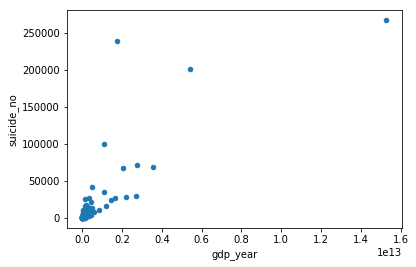

In [135]:
#graph of gdp per year versus num of suicides [2007]
df_avg_gdp_year_range.plot.scatter('gdp_year','suicide_no' )

#### Above is another scatter plot that we chose to do to see if there was a correlation between gdp per year (as opposed to capita) and suicides_no and there seems to be a much stronger correlation up until 0.4 outside of the 2 to 3 outliers in the visualization.

In [35]:
#creates a groupby object for the sum of population [2007]
gb_sum_pop_range = df_range.groupby('country')['population'].sum()
#gb_sum_pop_range.head()

#converts the groupby object back to a dataframe [2007]
df_sum_pop_range = gb_sum_pop_range.to_frame()
df_sum_pop_range.head()

country
Argentina    263102109
Armenia       19441954
Australia    144952605
Austria       55843882
Bahamas        2329018
Name: population, dtype: int64

## <font color='salmon'>TABLE:</font> 
### <font color='purple'>2007-2013 Population VS. Number of Suicides</font>

In [37]:
#adds suicide_no to gdp per capita dataframe [2007]
df_sum_pop_range['suicide_no'] = suicides_list
df_sum_pop_range.head()


,population,suicide_no
country,,
Argentina,263102109,20979
Armenia,19441954,473
Australia,144952605,16907
Austria,55843882,8949
Bahamas,2329018,39


## <font color='salmon'>Graph:</font> 
### <font color='purple'>2007-2013 Population VS. Number of Suicides</font>

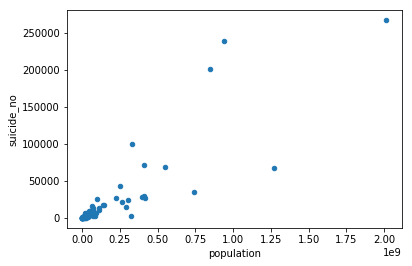

In [38]:
#graph of population versus num of suicides [2007]
df_sum_pop_range.plot.scatter('population','suicide_no' )

#### Again, this is a scatter plot comparing population against suicide_no and there also seems to be a strong correlation up until about the 1.00 mark. There are a few outliers as well but there does seem to be a trend.

## <font color='mediumorchid'>GDP 2007-2013 GDP Capita Range </font>

In [39]:
#get values of dataframe from only 2008
#df_2008 = df.loc[(df['year'] == 2008)]
#df_2008.head()
r_gdp = df_range['gdp_capita'].max()-df_range['gdp_capita'].min()

r_gdp_min = df_range['gdp_capita'].min()
 
r_gdp_max = df_range['gdp_capita'].max()

print(r_gdp_min, r_gdp_max, r_gdp)


814 122729 121915


In [40]:
df_range_min = df.loc[(df['gdp_capita'] >= 814) & (df['gdp_capita'] <= 61771)]
df_range_max = df.loc[(df['gdp_capita'] >= 61772) & (df['gdp_capita'] <= 122729)]

In [76]:
df_range_min.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,gdp_year,gdp_capita,generation
588,Argentina,1985,male,75+ years,202,363000,55.65,"88,416,668,900",3264,G.I. Generation
589,Argentina,1985,male,55-74 years,485,1997000,24.29,"88,416,668,900",3264,G.I. Generation
590,Argentina,1985,male,35-54 years,414,3346300,12.37,"88,416,668,900",3264,Silent
591,Argentina,1985,female,55-74 years,210,2304000,9.11,"88,416,668,900",3264,G.I. Generation
592,Argentina,1985,male,25-34 years,177,2234200,7.92,"88,416,668,900",3264,Boomers


In [143]:
df_range_max.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,gdp_year,gdp_capita,generation
1726,Australia,2011,male,75+ years,146,588053,24.83,"1,394,280,784,778",66770,Silent
1727,Australia,2011,male,35-54 years,704,3072726,22.91,"1,394,280,784,778",66770,Generation X
1728,Australia,2011,male,25-34 years,347,1610295,21.55,"1,394,280,784,778",66770,Millenials
1729,Australia,2011,male,55-74 years,366,2104816,17.39,"1,394,280,784,778",66770,Boomers
1730,Australia,2011,male,15-24 years,242,1570069,15.41,"1,394,280,784,778",66770,Millenials


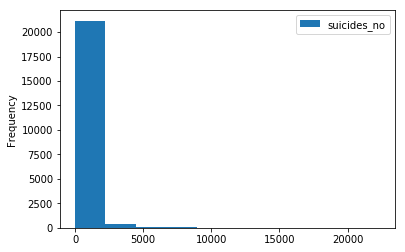

In [144]:
df_range_min.plot.hist(x = 'gdp_capita',y = 'suicides_no' )

#### This histogram was made to show the frequency of number of suicides within ranges of gdp_capita from the dataframe df_range_min, which contains a range of gdp per capita from 814 and 61771. It is a right skewed distribution and it shows a higher frequency of suicides between 0 and 2500 gdp per capita.

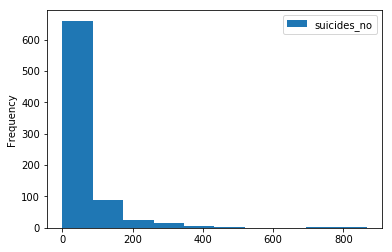

In [145]:
df_range_max.plot.hist( x = 'gdp_capita', y = 'suicides_no')

#### This histogram compares the same variables but from the dataframe df_range_max which contains gdp_capita from 61772 to 122729. It is also a right skewed distribution and shows a higher frequency of suicides from the range 0-200.

# <font color='black'>Data Analysis</font>

### <font color='salmon'> T-Test</font>

In [148]:

t_val,p_val = stats.ttest_ind(df_max_suic,df_min_suic)

#Using an alpha value 0.01
if p_val < 0.01:
    print(p_val,'There is a significant difference between the suicide numbers!')
else:
    print(p_val,'There is NOT a significant difference between the suicide numbers!')

2.95498703533e-11 There is a significant difference between the suicide numbers!


### <font color='salmon'> Pivot Table</font>

In [150]:
pv = pd.pivot_table(df_range, values = 'suicides_no', index=[ 'country','gdp_capita'])
pv.head()

suicides_no
country   gdp_capita             
Argentina 7918         245.500000
          8961         240.333333
          9843         254.916667
          11273        245.250000
          13946        242.666667

### <font color='salmon'>Linear Regression</font>

In [151]:
outcome_1_max, predictors_1_max = patsy.dmatrices('suicides_no ~ gdp_capita',df_range)
mod_1_max = sm.OLS(outcome_1_max, predictors_1_max)
res_1_max = mod_1_max.fit()
print(res_1_max.summary())

                            OLS Regression Results                            
Dep. Variable:            suicides_no   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     13.45
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           0.000248
Time:                        12:56:48   Log-Likelihood:                -48888.
No. Observations:                5964   AIC:                         9.778e+04
Df Residuals:                    5962   BIC:                         9.779e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.1958     17.132     12.269      0.0

Since the R-squared value and the Adjusted R-squared value was 0.002, we can conclude that there was no correlation found between the `suicides_no` amount and the `gdp_capita` variables 

also with the warnings we also bring into considerations that because the condition number is large there were some numerical problems during the analysis 

## Analysis 
   Firstly, we made 3 scatter plot graphs with different variables each. The first graph relates `gdp_capita` vs. `suicides_no`. The second shows GDP per year vs number of suicides and the third shows population vs. number of suicides. All graphs show data from a six year range (2007 to 2013). Upon looking at the distribution of the spreads, we find that the scatterplots, GDP per year vs. number of suicides and population vs. number of suicides are weakly positively correlated but generally have no correlation since the points seem to be clustered together towards the left corner of the graph. This indicates that countries with small amounts of GDP per year and population also have relatively small numbers of suicide (for both graphs). However, there are still outliers with high GPA per year/population and higher numbers of suicide. In the third graph, GDP per capita vs. the number of suicides, also shows no correlation but more variation among the countries and their GDP per capita. The plot points seem to spread towards the bottom of the graph showing that most countries who have either a low or high GDP per capita have relatively the same small number of suicides. This graph also contains outliers with high number of suicides and low GDP per capita, which shows that although our hypothesis is not supported by this graph, the outliers help show that there are a few countries who have higher suicide rates and low GDP per capita. 
   
   
In addition to the scatter plots, we also wanted to make two bar graphs and compare them to see if low GDP and high GDP values for each country have different amounts of suicides. Based on looking at the bar graphs, we found that there was a higher frequency of suicides for countries with low GDP when compared to countries with high GDP. We used a t-test with an alpha level of .01 and found that there was a significant difference between the suicide numbers.

To see if this statistically significant from the t-test is related to the correlation between `suicides_no` and `gdp_capita` variables, we did a linear regression model. The r-square value from the regression model also shows that there are no extreme values in the distribution because it was the same value of the adjusted r-square value.  The regression model also shows with the r-square value is very low (0.002) which tells us that only 2% of the variance of GDP per capita is explained by the correlation. The other 98% of the total variation in GDP per capita remains unexplained. This low r-square value suggests that these variables are a 'bad fit' in this model and thus, have no correlation. This could be cause by large condition number (5.69e+04) which indicates that there are strong multicollinearity or other numerical problems. Another explanation might be that the standard error assumes that the covariance matrix of the errors is correctly specified. Due to these warnings, we cannot completely reject the null hypothesis that there is a significant difference between GDP per capita and number of suicides.

## Ethics & Privacy

### <font color='salmon'> A. Data Collection</font>
We are using data that is public. All the datasets that we will find are open to the public and found on www.kaggle.com. Due to the public availability of this website, we are not violating the consent of those who gave their data to Kaggle or the author. There are also no ethics-related issues regarding our data as we are simply gathering data and statistics that are present.

### <font color='salmon'> B. Data Storage</font>
The data presented by Kaggle shows mere overall population demographics with numbers rather than specific names or any traceable ID. Therefore, we are sure that this dataset does not have any risks of privacy violations. 

### <font color='salmon'> C. Analysis: </font>
It is noted that Asian and African countries aren’t included. We are unsure of the reason but have exercised appropriate data cleaning. After the cleaning, our data still included enough variety of GDP in other countries to ensure the validity of the research.

In addition, since suicide is still considered a sensitive issue and is highly illegal in some countries, some datas may have been unreported or falsified. According to an article by World Health Organization mentioned in the References, only 60 states in the United States reported "good-quality" data on their suicide numbers. This leads to the data reported to not be fully accurate and/or underreported. 

### <font color='salmon'> D. Modelling</font>
As mentioned in part A, the data contains all factual numbers of countries from different parts of the world. There should not be any discriminatory within the data collected or any of our analysis since we are analyzing numbers of facts from a public dataset.

### <font color='salmon'> E. Deploy: </font>
Despite the fact that our research question relates to a sensitive issue, the research has a scientific and economic aim. All the information is used with consent, therefore not harming any participants with our findings.



## Conclusion & Discussion 

In this project we wanted to answer the main question about whether there is a correlation between a country’s `GDP per capita` and the `number of suicides` committed per population in that country. From the analysis, our regression model detected no correlation between the `number of suicides` and `gdp per capita` value. The results concluding no correlation were: the R-square value was very low (0.002) which tells us the `suicides_no` and `gdp_capita` variables do not have a 'good fit' thus have no correlation. Another factor was in the OLS regression results, we were presented with a warning that explained there are possible numerical problems due to the large conditional values. While the t-test in our analysis showed a statistically significant value when comparing the `number of suicides` from the `df_range_min` and then the `number of suicides` from the `df_range_max`, there could've been outside factors the t-test was not able to count for. Additionally, our scatter plots had only shown weak to no correlation between GDP per capita, GDP per year, and population when compared to the number of suicides. 

We encounter multiple obstacles when finding our data. The largest obstacle that we encountered was when we were cleaning our data. We had to reclean our data because we found that besides NaN values there were also missing entries of years or other information for countries. We realized that trying to replace all those values with averages could also effect our analysis and results because there were too many countries with missing entries and this could effect our sampling distribution and the variance. Primarily, we decided to compare the two years with the least missing entries but this would not give us a statistically correct answer on if `gdp_capita` impacts `suicides_no` for there are other years that can impact the trend. So we decided to find a specific year range that most countries had reported on Kaggle. While over half of available countries did not report all years within the range of 2007 to 2013, this range 2007-2013 was decided on because it had the least amount of missing data and the years were still recent compared to testing years in the 1980s. Because of this, our data is heavily skewed to the countries that we were restricted to. Another obstacle we found was trying to pick the correct tests to analyze our data. Our data had multiple different values so we couldn't clean and use unique values. Also, the `df` contained both interval and ordinal values which also limited what tests we were able to use and how to test our data. This is why we chose to do a t-test and a linear regression model which was summarized by the pivot table. 

While we found that there were no correlations or significant differences in our hypothesis, we hoped that if our research were correct, we would have been able to find a possible cause for the amount of suicides happening globally. The ability to predict a probable cause would have helped many countries see that the country’s overall wealth is a factor that they could improve on in order to maintain the health and wellbeing of their population and lower possible suicides.